# Тестовое задание на позицию Junior Data Scientist

Страница с данными
https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindices


Прямая ссылка
https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/datasets/consumerpriceindices/current/mm23.csv


Задача
Целевая переменная - “CPI INDEX 01.1.4 : MILK, CHEESE & EGGS”
1. Опишите характеристики и особенности представленных данных.
2. Проведите базовый анализ зависимости между целевой переменной и любым
другим временным рядом из данных.
3. Постройте предиктивную модель для целевой переменной с любым набором
признаков, проведите анализ результатов.
4. Сгенерируйте дополнительные признаки для предиктивной модели, оцените их
влияние на результат.
Важно показать управление данными и общие подходы к анализу.
Задание необходимо выполнить в Jupyter Notebook на Python и прислать ссылку на
открытый репозиторий.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/b93c2383b8e0cd6482231324e75ffa452e1ed106")


Где: $Q^0_i$ — выпуск i-го товара в базовом году
    $P^0_i$ — цена i-го товара в базовом году
    $P^t_i$ — цена i-го товара в текущем году

# 0. Загрузка, чистка и предобработка

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
df = pd.read_csv("C:/Users/music/Downloads/mm23.csv")

C:\Users\music\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [5]:
df.head(10)

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 RPI: Ave price - Salmon fillets, per Kg CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SER

In [6]:
df1=df.loc[:,(~df.columns.str.contains(pat = 'ANNUAL')) & (~df.columns.str.contains(pat = 'MONTHLY')) & (~df.columns.str.contains(pat = 'CPIH'))]

In [7]:
df1.shape

(1380, 1798)

In [8]:
df1=pd.concat([df1["Title"],df1.filter(regex='CPI INDEX')], axis=1)

In [9]:
df1=df1[df1.Title.str.contains('[0-9]{4} [A-Z]{3}',regex= True, na=False)]

In [10]:
df1=df1[df1['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].isna()==False]

In [11]:
df1.head()

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SERVICES 2015=100 CPI INDEX 07.2.3 : MAINTE

In [12]:
df1.dtypes

Title                                                                        object
CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                               object
CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100         object
CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100           object
CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100        object
                                                                              ...  
CPI INDEX: Excluding energy (SP) 2015=100                                    object
CPI INDEX: Excluding Energy, food, alcoholic beverages & tobacco 2015=100    object
CPI INDEX: Excluding energy & unprocessed food (SP) 2015=100                 object
CPI INDEX: Excluding seasonal food (SP) 2015=100                             object
CPI INDEX: Excluding energy & seasonal food (SP) 2015=100                    object
Length: 368, dtype: object

In [13]:
#Изменим тип данных и преобразуем Дату в формат даты
df2=pd.concat([pd.to_datetime(df1.Title).rename('Date'), df1.iloc[:,1:].astype('float')], axis=1)


## 1. Описание данных и целевой переменной

In [14]:
df2.head()

Date  CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100  CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100  CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100  CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100  CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100  CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100  CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100  CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100  CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100  CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100  CPI INDEX 03.1 : CLOTHING 2015=100  CPI INDEX 02.2 : TOBACCO 2015=100  CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 06 : HEALTH 2015=100  CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100  CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100  CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100  CPI INDEX 01.1 : FOOD 2015=100  CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100  CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100  CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100  CPI INDEX 00: ALL ITEMS 2015=100  CPI INDEX 10 : EDUCATION 2015=100  CPI INDEX 09 : RECREATION & CULTURE 2015=100  CPI INDEX 08 : COMMUNICATION 2015=100  CPI INDEX 07 : TRANSPORT 2015=100  CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100  CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100  CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100  CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100  CPI INDEX 03.1.2 : GARMENTS 2015=100  CPI INDEX 02.1.3 : BEER 2015=100  CPI INDEX 02.1.2 : WINE 2015=100  CPI INDEX 02.1.1 : SPIRITS 2015=100  CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100  CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100  CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100  CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100  CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100  CPI INDEX 01.1.6 : FRUIT 2015=100  CPI INDEX 12.6.2 : Other financial services (nec) 2015=100  CPI INDEX 12.1 : PERSONAL CARE 2015=100  CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100  CPI INDEX 01.1.5 : OILS & FATS 2015=100  CPI INDEX 11.1 : Catering services 2015=100  CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100  CPI INDEX 01.1.3 : FISH 2015=100  CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100  CPI INDEX 01.1.2 : MEAT 2015=100  CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100  CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100  CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100  CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100  CPI INDEX 08.1 : POSTAL SERVICES 2015=100  CPI INDEX 12.5 : INSURANCE 2015=100  CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100  CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100  CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100  CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100  CPI INDEX 12.5.2 : House contents insurance 2015=100  CPI INDEX 09.1.3 : Data processing equipment 2015=100  CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100  CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100  CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100  CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100  CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100  CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100  CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=

In [15]:
df2['Year']=df2.Date.dt.year
df2['Month']=df2.Date.dt.month

In [16]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing_values_table(df2)

Your selected dataframe has 370 columns.
There are 214 columns that have missing values.


Missing Values  % of Total Values
CPI INDEX 07.2.4.1 Hire of garages, parking spaces and personal transport equipment 2015=100  324             84.8             
CPI INDEX 09.4.2.1 Cinemas, theatres, concerts 2015=100                                       324             84.8             
CPI INDEX 05.2.0.3 Table linen and bathroom linen 2015=100                                    324             84.8             
CPI INDEX 05.5.2.1 Non-motorized small tools 2015=100                                         324             84.8             
CPI INDEX 05.5.1.2 Repair, leasing and rental of major tools and equipment 2015=100           324             84.8             
...                                                                                           ...              ...             
CPI INDEX 06.1.2/3 : OTHER MEDICAL AND THERAPEUTIC EQUIPMENT 2015=100                         83              21.7             
CPI INDEX 09.6 : PACKAGE HOLIDAY 2015=100                                                     60              15.7             
CPI INDEX: Package holidays & accommodation (S) 2015=100                                      60              15.7             
CPI INDEX 05.3.3 : REPAIR OF HOUSEHOLD APPLIANCES 2015=100                                    60              15.7             
CPI INDEX 09.1.3 : Data processing equipment 2015=100                                         35              9.2              

[214 rows x 2 columns]

C:\Users\music\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


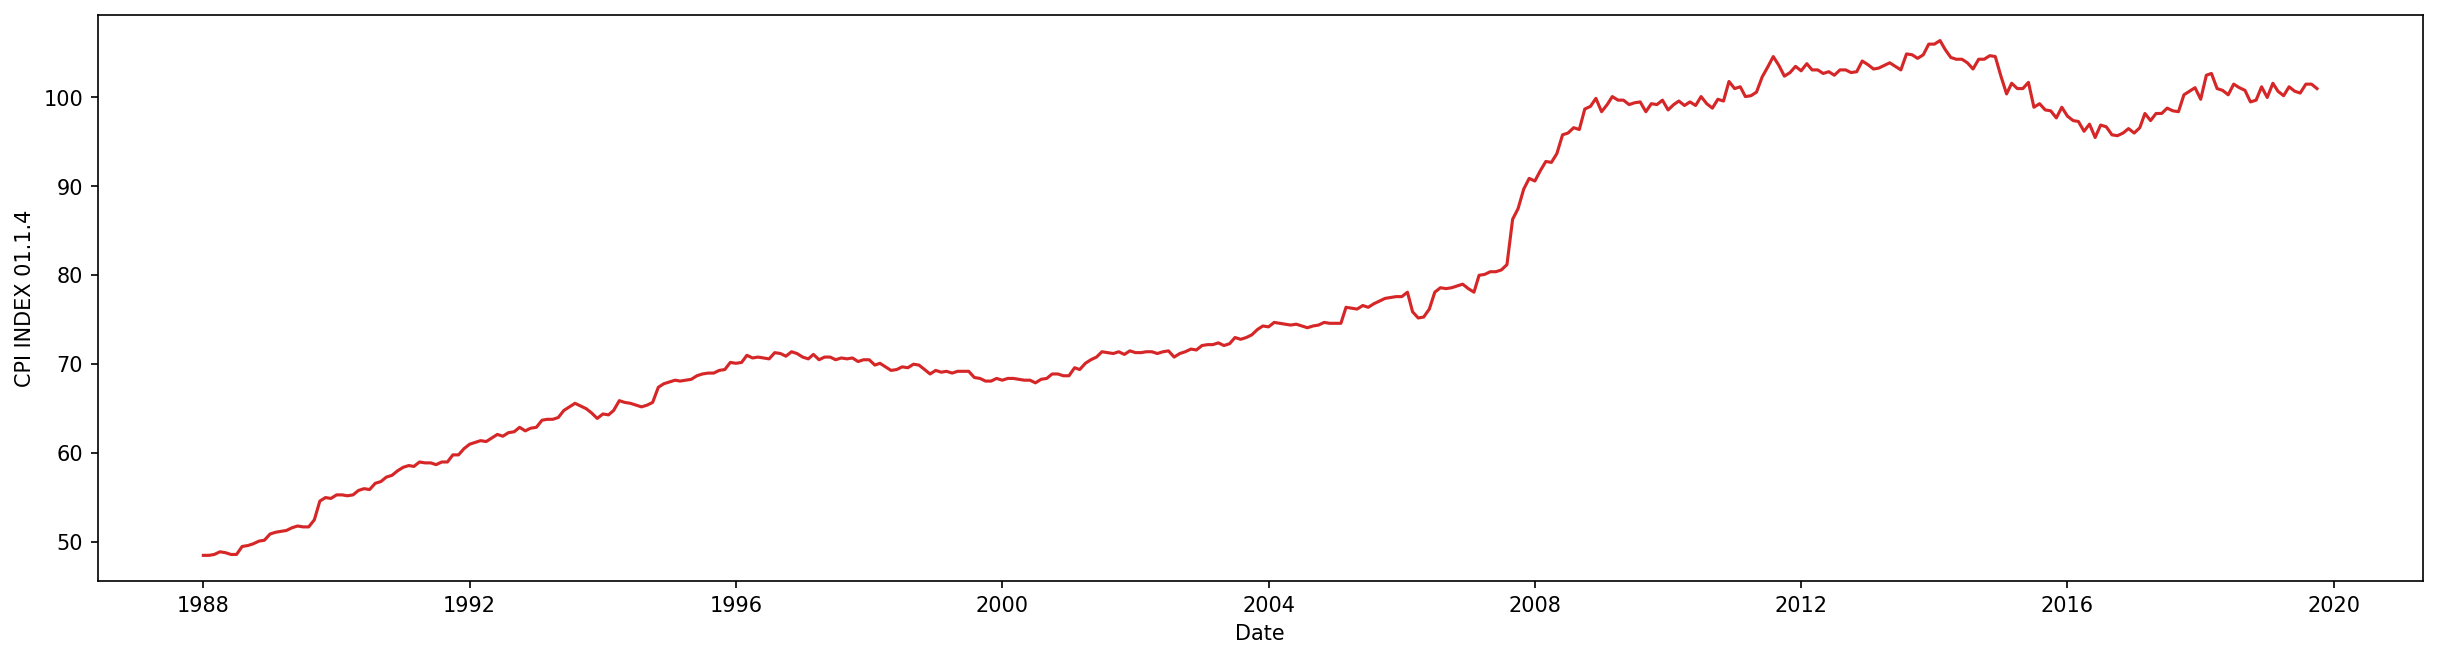

In [18]:
def plot_df(x, y, title="", xlabel='Date', ylabel='CPI INDEX 01.1.4', dpi=150):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=df2.Date, y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], title='')

### Рассмотрим данные в разрезе последних 3 лет

Индекс потребительских цен для молочки медленно рос до 2008(начало мирового кризиса), а после этого совершил скачок на 20 пунктов и после этого наблюдаются флуктуации.

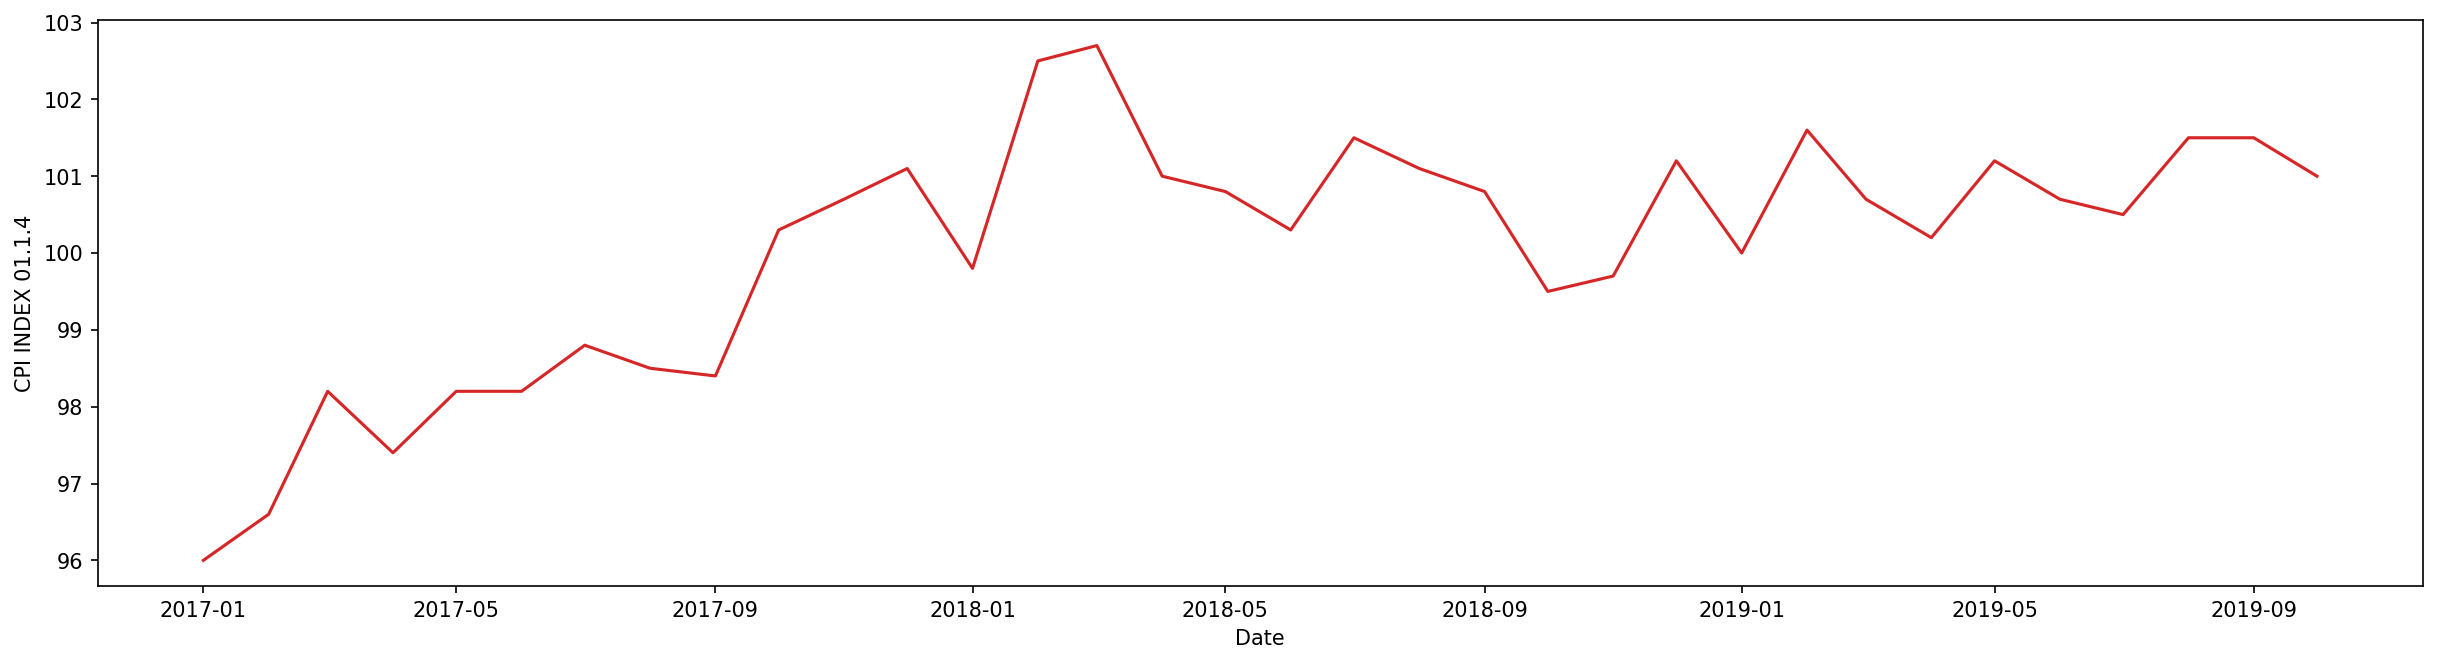

In [19]:
plot_df(x=df2.Date[df2.Year>=2017], y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][df2.Year>=2017], title='')

Сезонность не видна в данных

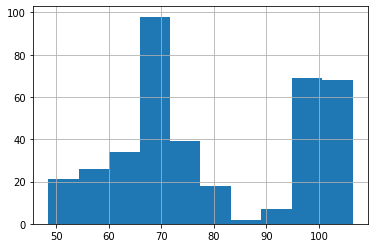

In [20]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].hist()

Гистограмма также демонстрирует бимодальность, которая разделяет моды до 2008г и после.

In [21]:
#Базовые статистики
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].describe()

count    382.000000
mean     79.796859 
std      17.296058 
min      48.500000 
25%      68.300000 
50%      74.000000 
75%      99.200000 
max      106.400000
Name: CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100, dtype: float64

In [22]:
#Базовые статистики по группе молочки, яйца и молочные субпродукты
df2.filter(regex='01.1.4').describe()

CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 01.1.4.2 Low fat milk 2015=100  CPI INDEX 01.1.4.1 Whole milk 2015=100  CPI INDEX 01.1.4.6 Other milk products 2015=100  CPI INDEX 01.1.4.5 Cheese and curd 2015=100  CPI INDEX 01.1.4.4 Yoghurt 2015=100  CPI INDEX 01.1.4.7 Eggs 2015=100
count  382.000000                                       58.000000                                 58.00000                                58.000000                                        58.000000                                    58.000000                            58.000000                       
mean   79.796859                                        99.870690                                 104.85000                               101.434483                                       98.524138                                    99.068966                            92.113793                       
std    17.296058                                        2.348423                                  4.82887                                 3.402092                                         1.960783                                     4.387031                             4.708985                        
min    48.500000                                        96.300000                                 99.30000                                93.500000                                        94.500000                                    90.200000                            85.200000                       
25%    68.300000                                        97.600000                                 100.40000                               99.250000                                        97.325000                                    95.925000                            89.675000                       
50%    74.000000                                        100.300000                                102.40000                               102.250000                                       98.500000                                    99.150000                            90.800000                       
75%    99.200000                                        102.000000                                110.37500                               104.400000                                       99.575000                                    101.775000                           91.800000                       
max    106.400000                                       102.900000                                112.20000                               107.100000                                       103.300000                                   108.200000                           104.500000

# 2. Анализ зависимости между целевой переменной и любым другим временным рядом из данных
Базовая зависимость между переменными легче всего определить через линейную взаимосвязь,что выражается коэф.корреляции.
Найдем переменные, которые высоко коррелируют с целевой.

In [23]:
df2=df2.set_index('Date')

In [24]:
correlations=df2.corr()['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [25]:
correlations.abs().sort_values(ascending=False)[1:50]

CPI INDEX: Non-seasonal food (G) 2015=100                                           0.985765
CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100                    0.983588
CPI INDEX 01.1 : FOOD 2015=100                                                      0.982421
CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100                            0.981336
CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100                                         0.979511
CPI INDEX 04.4.1 : WATER SUPPLY 2015=100                                            0.976525
CPI INDEX 01.1.2 : MEAT 2015=100                                                    0.976214
CPI INDEX: Energy and unprocessed food (SP) 2015=100                                0.975172
CPI INDEX: Unprocessed food (G) 2015=100                                            0.973907
CPI INDEX: Energy, food, alcohol and tobacco (SP) 2015=100                          0.973246
CPI INDEX: Energy and seasonal food (SP) 2015=100                     

Проверим выборочно полученные результаты и построим графики(если точки лежат на одной прямой, то это будет означать, что связь между переменными действительно линейная)

Text(0.5, 1.0, 'Correlation')

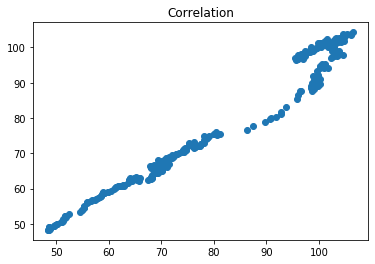

In [26]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Non-seasonal food (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

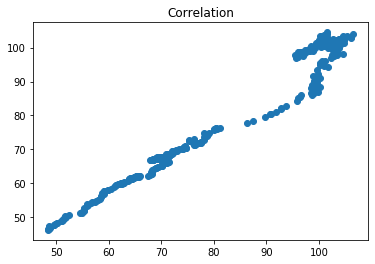

In [27]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

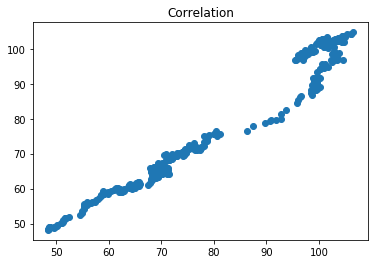

In [28]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX 01.1 : FOOD 2015=100']);
plt.title('Correlation')

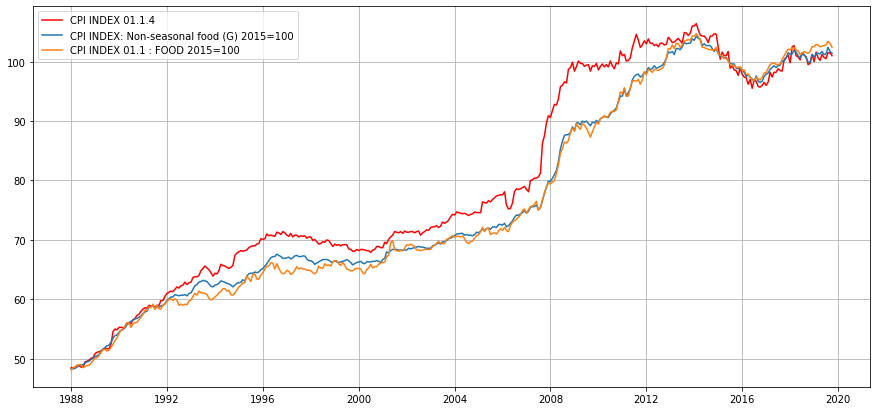

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], "r", label="CPI INDEX 01.1.4")
plt.plot(df2['CPI INDEX: Non-seasonal food (G) 2015=100'], label="CPI INDEX: Non-seasonal food (G) 2015=100")
plt.plot(df2['CPI INDEX 01.1 : FOOD 2015=100'], label="CPI INDEX 01.1 : FOOD 2015=100")
plt.legend(loc="best")
plt.grid(True);

In [30]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].autocorr()

0.9991344197599843

Автокорреляция очень сильная, попробуем провести декомпозицию и построим АФКФ и ЧАКФ.

Критерий Дики-Фуллера: p=0.587382


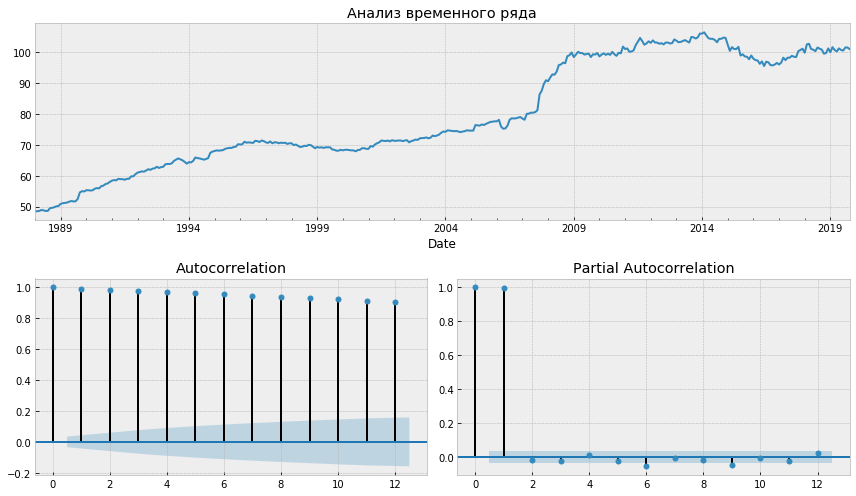

In [31]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Анализ временного ряда')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], lags=12)

Критерий Дики-Фуллера:
H0: Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.
H1: Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры.
Т.к. p=0.587382>0.05 т.о. мы не можем отклонить нулевую гипотезу, следовательно ряд является нестационарным.

Проведем декомпозицию по аддидивной модели выделяя тренд, сезонность и остатки

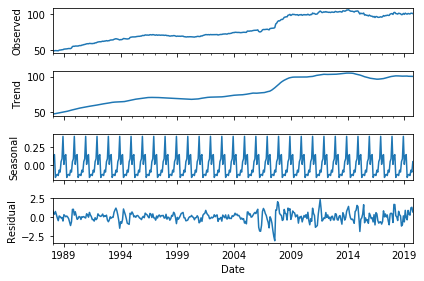

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], model='additive', 
                            #freq=12
                            extrapolate_trend='freq'
                           )
result.plot()
plt.rcParams["figure.figsize"] = [16,19]
plt.show()

Хотя декомпозиция ряда и выловила сезонную составляющую, но она похожа скорее на шум.

# 3. Построим предиктивную модель как временного ряда(без предикторов)

In [33]:
df3=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][df2['Year']>2008]

In [34]:
df3.head()

Date
2009-01-01    98.4 
2009-02-01    99.2 
2009-03-01    100.1
2009-04-01    99.7 
2009-05-01    99.7 
Name: CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100, dtype: float64

# 3.1 Проведем классический анализ временного ряда и построим модель SARIMA

In [35]:
#Разделим данные на обучающее и тестовое множество-10%
train = df3[:int(0.9*(len(df3)))]
test = df3[int(0.9*(len(df3))):]
print(train.shape)
print(test.shape)

(117,)
(13,)


In [36]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\music\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\music\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=304.684, BIC=318.452, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=305.635, BIC=311.142, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=302.787, BIC=313.801, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=302.919, BIC=313.934, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=303.186, BIC=311.446, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=303.212, BIC=316.980, Fit time=0.192 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=304.118, BIC=317.885, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=304.643, BIC=321.165, Fit time=0.435 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=304.566, BIC=312.827, Fit time=0.037 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

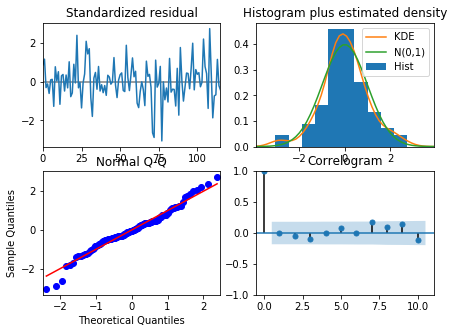

In [37]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

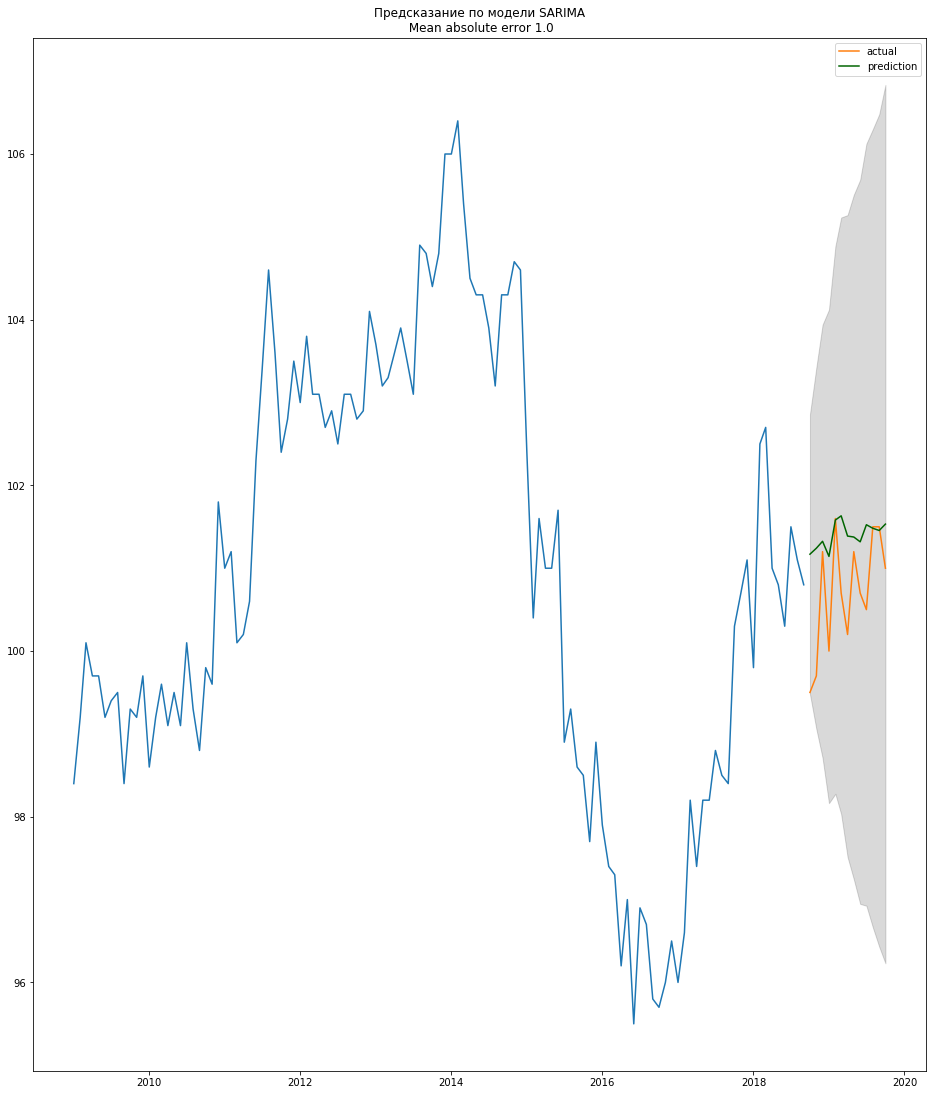

In [38]:
# Предсказание
from sklearn.metrics import mean_absolute_error, mean_squared_error
n_periods = test.shape[0]
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(test.index[0], periods = n_periods, freq='MS')

# создадим серию предсказаний для построения графика
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(test,label="actual")

plt.plot(fc_series, color='darkgreen',label="prediction")
plt.legend(loc="best")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Предсказание по модели SARIMA\n Mean absolute error {}".format(round(mean_absolute_error(fc_series, test))))
plt.show()

In [39]:
error=pd.DataFrame(data=dict(test=test, predict=fc_series,abs_error=abs(test-fc_series)))
print(error)

             test     predict  abs_error
2018-10-01  99.5   101.169462  1.669462 
2018-11-01  99.7   101.241462  1.541462 
2018-12-01  101.2  101.325055  0.125055 
2019-01-01  100.0  101.142539  1.142539 
2019-02-01  101.6  101.581634  0.018366 
2019-03-01  100.7  101.632388  0.932388 
2019-04-01  100.2  101.388068  1.188068 
2019-05-01  101.2  101.376709  0.176709 
2019-06-01  100.7  101.318757  0.618757 
2019-07-01  100.5  101.524831  1.024831 
2019-08-01  101.5  101.482411  0.017589 
2019-09-01  101.5  101.455521  0.044479 
2019-10-01  101.0  101.532605  0.532605 


In [40]:
from sklearn.metrics import *
print(mean_squared_error(test,fc_series))
print(mean_absolute_error(test,fc_series))
error.abs_error.mean()

0.8089044389218186
0.6947932548655914


0.6947932548655914

# 3.2 Построим линейную регрессию используя лаги

In [41]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)


    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [42]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = prepareData(df3, test_size=0.15, lag_start=3, lag_end=10)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

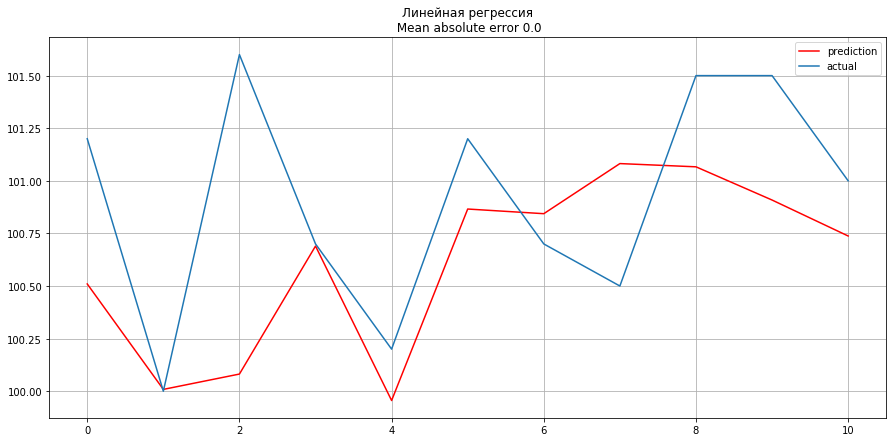

In [43]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_test,prediction))))
plt.grid(True);

Линейная регрессионная модель с лагами показала отличный результат с абсолютной ошибкой около 0.

In [44]:
error1=pd.DataFrame(data=dict(test=y_test, predict=prediction,abs_error=abs(y_test-prediction)))
error1.head(11)

test     predict  abs_error
110  101.2  100.509817  0.690183 
111  100.0  100.008653  0.008653 
112  101.6  100.081543  1.518457 
113  100.7  100.689887  0.010113 
114  100.2  99.955849   0.244151 
115  101.2  100.865904  0.334096 
116  100.7  100.843779  0.143779 
117  100.5  101.081909  0.581909 
118  101.5  101.066543  0.433457 
119  101.5  100.908668  0.591332 
120  101.0  100.737739  0.262261

In [45]:
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
error1.abs_error.mean()

0.35628196842095183
0.4380356701129903


0.4380356701129903

# 3.3 Предиктивная модель для целевой переменной с любым набором признаков

## 3.3.1 Линейная регрессия с 1-ой переменной

In [46]:
#df4=df2[df2['Year']>2008].reset_index(drop=True)
df4=df2[df2['Year']>2008].reset_index()
X_train=df4[['CPI INDEX: Non-seasonal food (G) 2015=100']][:len(df4)-13]
y_train=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][:len(df4)-13]
X_test=df4[['CPI INDEX: Non-seasonal food (G) 2015=100']][len(df4)-12:]
y_test=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][len(df4)-12:]
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

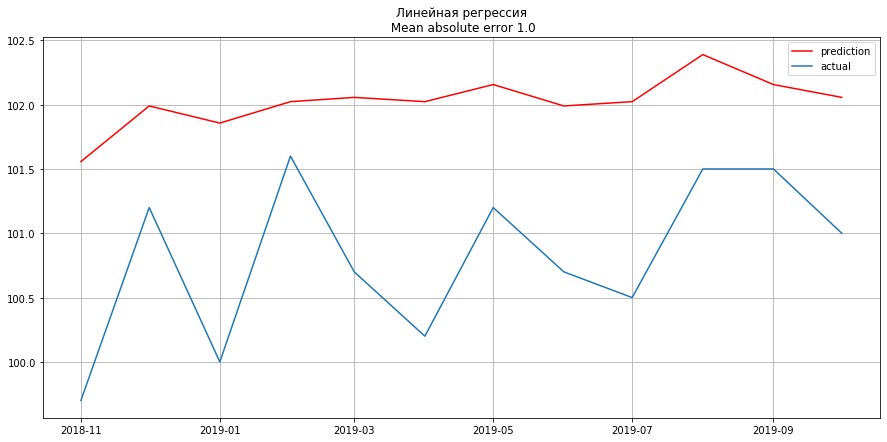

In [47]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],prediction, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_test,prediction))))
plt.grid(True);

In [48]:
pd.DataFrame(data=dict(test=y_test, predict=prediction,abs_error=abs(y_test-prediction)))

test     predict  abs_error
118  99.7   101.557093  1.857093 
119  101.2  101.989744  0.789744 
120  100.0  101.856621  1.856621 
121  101.6  102.023025  0.423025 
122  100.7  102.056306  1.356306 
123  100.2  102.023025  1.823025 
124  101.2  102.156149  0.956149 
125  100.7  101.989744  1.289744 
126  100.5  102.023025  1.523025 
127  101.5  102.389115  0.889115 
128  101.5  102.156149  0.656149 
129  101.0  102.056306  1.056306

# 3.3.2 Catboost регрессия сo всеми переменными

In [68]:
X = df4.drop(['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100','Date'], axis=1)
y = df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [50]:
categorical_features_indices = np.where((X.columns == 'Month')| (X.columns == 'Year'))[0]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, shuffle=True)

In [52]:
from catboost import CatBoostRegressor,Pool
model=CatBoostRegressor(#iterations=50, 
                        depth=6, 
                        learning_rate=0.01, 
                        loss_function='MAE',
                        l2_leaf_reg = 20,
                        task_type = "GPU",
                        early_stopping_rounds=100)
model.fit(X_train, y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          use_best_model=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1305043	test: 2.1316184	best: 2.1316184 (0)	total: 79.2ms	remaining: 1m 19s
1:	learn: 2.1283922	test: 2.1301757	best: 2.1301757 (1)	total: 158ms	remaining: 1m 18s
2:	learn: 2.1260033	test: 2.1283123	best: 2.1283123 (2)	total: 236ms	remaining: 1m 18s
3:	learn: 2.1233672	test: 2.1260677	best: 2.1260677 (3)	total: 314ms	remaining: 1m 18s
4:	learn: 2.1207986	test: 2.1241298	best: 2.1241298 (4)	total: 392ms	remaining: 1m 18s
5:	learn: 2.1188842	test: 2.1225373	best: 2.1225373 (5)	total: 471ms	remaining: 1m 18s
6:	learn: 2.1165290	test: 2.1216382	best: 2.1216382 (6)	total: 550ms	remaining: 1m 17s
7:	learn: 2.1142320	test: 2.1198303	best: 2.1198303 (7)	total: 629ms	remaining: 1m 17s
8:	learn: 2.1117840	test: 2.1177976	best: 2.1177976 (8)	total: 707ms	remaining: 1m 17s
9:	learn: 2.1093766	test: 2.1158410	best: 2.1158410 (9)	total: 788ms	remaining: 1m 18s
10:	learn: 2.1069647	test: 2.1140507	best: 2.1140507 (10)	total: 866ms	remaining: 1m 17s
11:	learn: 2.1045145	test: 2.1119489	bes

94:	learn: 1.9151026	test: 1.9655027	best: 1.9655027 (94)	total: 8.34s	remaining: 1m 19s
95:	learn: 1.9125844	test: 1.9634318	best: 1.9634318 (95)	total: 8.41s	remaining: 1m 19s
96:	learn: 1.9103040	test: 1.9620079	best: 1.9620079 (96)	total: 8.49s	remaining: 1m 19s
97:	learn: 1.9082940	test: 1.9605415	best: 1.9605415 (97)	total: 8.58s	remaining: 1m 18s
98:	learn: 1.9060773	test: 1.9589448	best: 1.9589448 (98)	total: 8.67s	remaining: 1m 18s
99:	learn: 1.9039366	test: 1.9572775	best: 1.9572775 (99)	total: 8.76s	remaining: 1m 18s
100:	learn: 1.9015874	test: 1.9555354	best: 1.9555354 (100)	total: 8.84s	remaining: 1m 18s
101:	learn: 1.8992316	test: 1.9538773	best: 1.9538773 (101)	total: 8.93s	remaining: 1m 18s
102:	learn: 1.8971501	test: 1.9522259	best: 1.9522259 (102)	total: 9.02s	remaining: 1m 18s
103:	learn: 1.8948194	test: 1.9504492	best: 1.9504492 (103)	total: 9.11s	remaining: 1m 18s
104:	learn: 1.8924612	test: 1.9486625	best: 1.9486625 (104)	total: 9.19s	remaining: 1m 18s
105:	learn:

187:	learn: 1.7140140	test: 1.8106021	best: 1.8106021 (187)	total: 15.9s	remaining: 1m 8s
188:	learn: 1.7121507	test: 1.8090959	best: 1.8090959 (188)	total: 16s	remaining: 1m 8s
189:	learn: 1.7098703	test: 1.8078447	best: 1.8078447 (189)	total: 16.1s	remaining: 1m 8s
190:	learn: 1.7078363	test: 1.8066899	best: 1.8066899 (190)	total: 16.2s	remaining: 1m 8s
191:	learn: 1.7058069	test: 1.8048940	best: 1.8048940 (191)	total: 16.3s	remaining: 1m 8s
192:	learn: 1.7036841	test: 1.8033803	best: 1.8033803 (192)	total: 16.4s	remaining: 1m 8s
193:	learn: 1.7016819	test: 1.8018732	best: 1.8018732 (193)	total: 16.5s	remaining: 1m 8s
194:	learn: 1.6997549	test: 1.8005401	best: 1.8005401 (194)	total: 16.6s	remaining: 1m 8s
195:	learn: 1.6977369	test: 1.7994350	best: 1.7994350 (195)	total: 16.6s	remaining: 1m 8s
196:	learn: 1.6962003	test: 1.7980703	best: 1.7980703 (196)	total: 16.7s	remaining: 1m 8s
197:	learn: 1.6940943	test: 1.7970003	best: 1.7970003 (197)	total: 16.8s	remaining: 1m 8s
198:	learn: 

280:	learn: 1.5286396	test: 1.6766859	best: 1.6766859 (280)	total: 24.5s	remaining: 1m 2s
281:	learn: 1.5263615	test: 1.6748939	best: 1.6748939 (281)	total: 24.6s	remaining: 1m 2s
282:	learn: 1.5245331	test: 1.6735091	best: 1.6735091 (282)	total: 24.7s	remaining: 1m 2s
283:	learn: 1.5226365	test: 1.6718510	best: 1.6718510 (283)	total: 24.8s	remaining: 1m 2s
284:	learn: 1.5204633	test: 1.6703771	best: 1.6703771 (284)	total: 24.8s	remaining: 1m 2s
285:	learn: 1.5183936	test: 1.6689192	best: 1.6689192 (285)	total: 24.9s	remaining: 1m 2s
286:	learn: 1.5160996	test: 1.6672396	best: 1.6672396 (286)	total: 25s	remaining: 1m 2s
287:	learn: 1.5140475	test: 1.6656048	best: 1.6656048 (287)	total: 25.1s	remaining: 1m 2s
288:	learn: 1.5119873	test: 1.6644391	best: 1.6644391 (288)	total: 25.2s	remaining: 1m 1s
289:	learn: 1.5102229	test: 1.6632464	best: 1.6632464 (289)	total: 25.2s	remaining: 1m 1s
290:	learn: 1.5083027	test: 1.6619905	best: 1.6619905 (290)	total: 25.3s	remaining: 1m 1s
291:	learn: 

374:	learn: 1.3632621	test: 1.5505801	best: 1.5505801 (374)	total: 32.1s	remaining: 53.5s
375:	learn: 1.3619399	test: 1.5496056	best: 1.5496056 (375)	total: 32.2s	remaining: 53.4s
376:	learn: 1.3606479	test: 1.5482740	best: 1.5482740 (376)	total: 32.3s	remaining: 53.3s
377:	learn: 1.3591541	test: 1.5474135	best: 1.5474135 (377)	total: 32.3s	remaining: 53.2s
378:	learn: 1.3576682	test: 1.5461583	best: 1.5461583 (378)	total: 32.4s	remaining: 53.1s
379:	learn: 1.3566492	test: 1.5455829	best: 1.5455829 (379)	total: 32.5s	remaining: 53s
380:	learn: 1.3552754	test: 1.5443099	best: 1.5443099 (380)	total: 32.6s	remaining: 52.9s
381:	learn: 1.3538519	test: 1.5428286	best: 1.5428286 (381)	total: 32.7s	remaining: 52.8s
382:	learn: 1.3524837	test: 1.5417654	best: 1.5417654 (382)	total: 32.7s	remaining: 52.7s
383:	learn: 1.3508858	test: 1.5401984	best: 1.5401984 (383)	total: 32.8s	remaining: 52.6s
384:	learn: 1.3493984	test: 1.5387862	best: 1.5387862 (384)	total: 32.9s	remaining: 52.5s
385:	learn: 

468:	learn: 1.2316463	test: 1.4348304	best: 1.4348304 (468)	total: 39.8s	remaining: 45.1s
469:	learn: 1.2302412	test: 1.4336289	best: 1.4336289 (469)	total: 39.9s	remaining: 45s
470:	learn: 1.2291318	test: 1.4323885	best: 1.4323885 (470)	total: 40s	remaining: 44.9s
471:	learn: 1.2280511	test: 1.4313979	best: 1.4313979 (471)	total: 40.1s	remaining: 44.8s
472:	learn: 1.2267764	test: 1.4302747	best: 1.4302747 (472)	total: 40.2s	remaining: 44.8s
473:	learn: 1.2252893	test: 1.4289863	best: 1.4289863 (473)	total: 40.3s	remaining: 44.7s
474:	learn: 1.2240908	test: 1.4281126	best: 1.4281126 (474)	total: 40.3s	remaining: 44.6s
475:	learn: 1.2229333	test: 1.4271566	best: 1.4271566 (475)	total: 40.4s	remaining: 44.5s
476:	learn: 1.2216687	test: 1.4259371	best: 1.4259371 (476)	total: 40.5s	remaining: 44.4s
477:	learn: 1.2203294	test: 1.4251524	best: 1.4251524 (477)	total: 40.6s	remaining: 44.3s
478:	learn: 1.2192224	test: 1.4241187	best: 1.4241187 (478)	total: 40.7s	remaining: 44.3s
479:	learn: 1.

561:	learn: 1.1260452	test: 1.3373728	best: 1.3373728 (561)	total: 48s	remaining: 37.4s
562:	learn: 1.1247920	test: 1.3366926	best: 1.3366926 (562)	total: 48.1s	remaining: 37.3s
563:	learn: 1.1239527	test: 1.3358820	best: 1.3358820 (563)	total: 48.2s	remaining: 37.2s
564:	learn: 1.1230551	test: 1.3352719	best: 1.3352719 (564)	total: 48.2s	remaining: 37.1s
565:	learn: 1.1219693	test: 1.3344401	best: 1.3344401 (565)	total: 48.3s	remaining: 37.1s
566:	learn: 1.1205949	test: 1.3332839	best: 1.3332839 (566)	total: 48.4s	remaining: 37s
567:	learn: 1.1192660	test: 1.3322407	best: 1.3322407 (567)	total: 48.5s	remaining: 36.9s
568:	learn: 1.1183911	test: 1.3315515	best: 1.3315515 (568)	total: 48.6s	remaining: 36.8s
569:	learn: 1.1175067	test: 1.3308233	best: 1.3308233 (569)	total: 48.6s	remaining: 36.7s
570:	learn: 1.1165937	test: 1.3302474	best: 1.3302474 (570)	total: 48.7s	remaining: 36.6s
571:	learn: 1.1155893	test: 1.3293651	best: 1.3293651 (571)	total: 48.8s	remaining: 36.5s
572:	learn: 1.

654:	learn: 1.0239475	test: 1.2527503	best: 1.2527503 (654)	total: 56s	remaining: 29.5s
655:	learn: 1.0224462	test: 1.2512105	best: 1.2512105 (655)	total: 56.1s	remaining: 29.4s
656:	learn: 1.0204878	test: 1.2492091	best: 1.2492091 (656)	total: 56.2s	remaining: 29.3s
657:	learn: 1.0192433	test: 1.2476189	best: 1.2476189 (657)	total: 56.3s	remaining: 29.2s
658:	learn: 1.0179859	test: 1.2461932	best: 1.2461932 (658)	total: 56.3s	remaining: 29.2s
659:	learn: 1.0171634	test: 1.2456304	best: 1.2456304 (659)	total: 56.4s	remaining: 29.1s
660:	learn: 1.0159899	test: 1.2448065	best: 1.2448065 (660)	total: 56.5s	remaining: 29s
661:	learn: 1.0146475	test: 1.2438345	best: 1.2438345 (661)	total: 56.6s	remaining: 28.9s
662:	learn: 1.0131756	test: 1.2423655	best: 1.2423655 (662)	total: 56.7s	remaining: 28.8s
663:	learn: 1.0121230	test: 1.2414678	best: 1.2414678 (663)	total: 56.7s	remaining: 28.7s
664:	learn: 1.0109329	test: 1.2399394	best: 1.2399394 (664)	total: 56.8s	remaining: 28.6s
665:	learn: 1.

746:	learn: 0.9134734	test: 1.1565020	best: 1.1565020 (746)	total: 1m 3s	remaining: 21.4s
747:	learn: 0.9125092	test: 1.1555638	best: 1.1555638 (747)	total: 1m 3s	remaining: 21.4s
748:	learn: 0.9111894	test: 1.1541575	best: 1.1541575 (748)	total: 1m 3s	remaining: 21.3s
749:	learn: 0.9098784	test: 1.1528549	best: 1.1528549 (749)	total: 1m 3s	remaining: 21.2s
750:	learn: 0.9085658	test: 1.1516661	best: 1.1516661 (750)	total: 1m 3s	remaining: 21.1s
751:	learn: 0.9071976	test: 1.1507843	best: 1.1507843 (751)	total: 1m 3s	remaining: 21s
752:	learn: 0.9062650	test: 1.1498753	best: 1.1498753 (752)	total: 1m 3s	remaining: 20.9s
753:	learn: 0.9047410	test: 1.1483270	best: 1.1483270 (753)	total: 1m 3s	remaining: 20.8s
754:	learn: 0.9034635	test: 1.1470462	best: 1.1470462 (754)	total: 1m 3s	remaining: 20.8s
755:	learn: 0.9022367	test: 1.1454602	best: 1.1454602 (755)	total: 1m 4s	remaining: 20.7s
756:	learn: 0.9009347	test: 1.1446413	best: 1.1446413 (756)	total: 1m 4s	remaining: 20.6s
757:	learn: 

838:	learn: 0.8106184	test: 1.0747202	best: 1.0747202 (838)	total: 1m 11s	remaining: 13.7s
839:	learn: 0.8095169	test: 1.0735460	best: 1.0735460 (839)	total: 1m 11s	remaining: 13.6s
840:	learn: 0.8082503	test: 1.0732309	best: 1.0732309 (840)	total: 1m 11s	remaining: 13.5s
841:	learn: 0.8073659	test: 1.0727366	best: 1.0727366 (841)	total: 1m 11s	remaining: 13.4s
842:	learn: 0.8059842	test: 1.0711892	best: 1.0711892 (842)	total: 1m 11s	remaining: 13.4s
843:	learn: 0.8046765	test: 1.0699505	best: 1.0699505 (843)	total: 1m 11s	remaining: 13.3s
844:	learn: 0.8037486	test: 1.0691563	best: 1.0691563 (844)	total: 1m 11s	remaining: 13.2s
845:	learn: 0.8030106	test: 1.0686585	best: 1.0686585 (845)	total: 1m 11s	remaining: 13.1s
846:	learn: 0.8020167	test: 1.0682919	best: 1.0682919 (846)	total: 1m 12s	remaining: 13s
847:	learn: 0.8012290	test: 1.0675613	best: 1.0675613 (847)	total: 1m 12s	remaining: 12.9s
848:	learn: 0.8005013	test: 1.0670460	best: 1.0670460 (848)	total: 1m 12s	remaining: 12.8s
8

929:	learn: 0.7325579	test: 1.0106976	best: 1.0106976 (929)	total: 1m 18s	remaining: 5.93s
930:	learn: 0.7317933	test: 1.0101448	best: 1.0101448 (930)	total: 1m 18s	remaining: 5.85s
931:	learn: 0.7307495	test: 1.0093201	best: 1.0093201 (931)	total: 1m 18s	remaining: 5.76s
932:	learn: 0.7302484	test: 1.0089160	best: 1.0089160 (932)	total: 1m 19s	remaining: 5.67s
933:	learn: 0.7292325	test: 1.0081364	best: 1.0081364 (933)	total: 1m 19s	remaining: 5.59s
934:	learn: 0.7285620	test: 1.0076874	best: 1.0076874 (934)	total: 1m 19s	remaining: 5.5s
935:	learn: 0.7277801	test: 1.0071395	best: 1.0071395 (935)	total: 1m 19s	remaining: 5.42s
936:	learn: 0.7269986	test: 1.0061724	best: 1.0061724 (936)	total: 1m 19s	remaining: 5.34s
937:	learn: 0.7262023	test: 1.0059421	best: 1.0059421 (937)	total: 1m 19s	remaining: 5.25s
938:	learn: 0.7252715	test: 1.0050049	best: 1.0050049 (938)	total: 1m 19s	remaining: 5.17s
939:	learn: 0.7247671	test: 1.0045302	best: 1.0045302 (939)	total: 1m 19s	remaining: 5.08s


In [53]:
pred=model.predict(X_validation)

In [54]:
pd.DataFrame(data=dict(test=y_validation, predict=pred,abs_error=abs(y_validation-pred)))

test     predict  abs_error
111  101.0  100.368562  0.631438 
63   104.5  102.819530  1.680470 
57   104.4  103.096716  1.303284 
103  98.5   99.078598   0.578598 
33   102.4  102.215642  0.184358 
25   101.2  101.447335  0.247335 
127  101.5  101.328270  0.171730 
104  98.4   99.247538   0.847538 
6    99.4   99.319904   0.080096 
98   98.2   99.061845   0.861845 
10   99.2   99.369240   0.169240 
29   102.3  101.562763  0.737237 
110  102.7  100.964345  1.735655 
71   104.6  100.892286  3.707714 
60   106.0  103.098633  2.901367 
2    100.1  99.364251   0.735749 
78   98.9   99.793241   0.893241 
72   102.4  101.287836  1.112164 
43   103.1  102.884110  0.215890 
107  101.1  100.384588  0.715412 
114  101.5  100.634537  0.865463 
58   104.8  103.070046  1.729954 
8    98.4   99.289071   0.889071 
83   98.9   99.251692   0.351692 
89   95.5   98.544262   3.044262 
44   103.1  103.047777  0.052223 
26   100.1  101.063936  0.963936 
129  101.0  101.078934  0.078934 
112  100.8  100.617121  0.182879 
13   99.2   99.346115   0.146115 
64   104.3  103.104818  1.195182 
40   102.7  103.050953  0.350953 
94   96.0   98.587489   2.587489

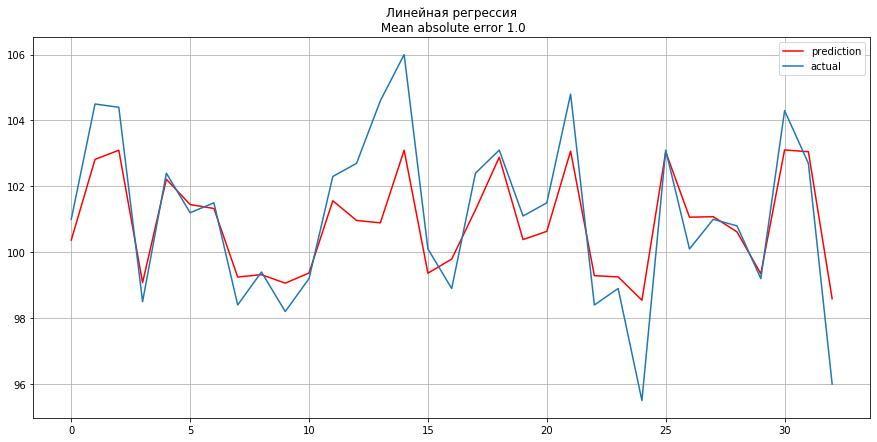

In [55]:
plt.figure(figsize=(15, 7))
plt.plot(pred, "r", label="prediction")
plt.plot(y_validation.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_validation,pred))))
plt.grid(True);

In [56]:
pred1=model.predict(X[len(X)-12:])
y_true=df4['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][len(X)-12:]
pd.DataFrame(data=dict(test=y_true, predict=pred1,abs_error=abs(y_true-pred1)))

test     predict  abs_error
118  99.7   99.864190   0.164190 
119  101.2  101.404448  0.204448 
120  100.0  99.936267   0.063733 
121  101.6  101.472409  0.127591 
122  100.7  100.698967  0.001033 
123  100.2  100.132801  0.067199 
124  101.2  101.509996  0.309996 
125  100.7  100.858717  0.158717 
126  100.5  100.519238  0.019238 
127  101.5  101.328270  0.171730 
128  101.5  101.640430  0.140430 
129  101.0  101.078934  0.078934

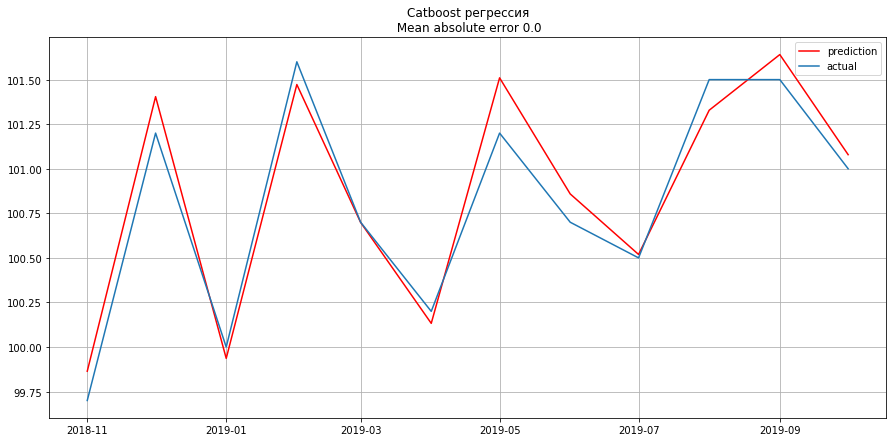

In [57]:
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],pred1, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_true.values, label="actual")
plt.legend(loc="best")
plt.title("Catboost регрессия\n Mean absolute error {}".format(round(mean_absolute_error(y_true,pred1))))
plt.grid(True);

In [58]:
mean_absolute_error(y_true,pred1)

0.1256033297591775

In [59]:
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, model.get_feature_importance(Pool(X_validation, label=y_validation,cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

Посмотрим топ 25 значимых параметров в модели

In [60]:
feature_score[:35]

Feature      Score
82   CPI INDEX 04.5.3 : LIQUID FUELS 2015=100                                                      20.472640
108  CPI INDEX 12.1.2/3 : APPLIANCES, ARTICLES & PRODUCTS FOR PERSONAL CARE 2015=100               15.542614
74   CPI INDEX 07.2.2 : FUELS & LUBRICANTS 2015=100                                                9.601937 
42   CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100                    8.906399 
86   CPI INDEX 05.6.1 : NON-DURABLE HOUSEHOLD GOODS 2015=100                                       6.753238 
0    CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                                                6.748857 
31   CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100                              4.268658 
151  CPI INDEX 01.1.4.4 Yoghurt 2015=100                                                           1.612680 
79   CPI INDEX 07.1.1B : SECOND-HAND CARS 2015=100                                                 1.606790 
360  CPI INDEX: Liquid fuels, vehicle fuels & lubricants (G) 2015=100                              1.337653 
63   CPI INDEX 12.5.2 : House contents insurance 2015=100                                          1.241838 
149  CPI INDEX 01.1.4.5 Cheese and curd 2015=100                                                   0.977363 
168  CPI INDEX 03.2.1.3 Footwear for infants and children 2015=100                                 0.728595 
228  CPI INDEX 05.3.1.1 Refrigerators, freezers and fridge freezers 2015=100                       0.638252 
93   CPI INDEX 12.3.1 : JEWELLERY CLOCKS AND WATCHES 2015=100                                      0.602032 
202  CPI INDEX 07.2.1.1 Tyres 2015=100                                                             0.552596 
318  CPI INDEX: Durables (G) 2015=100                                                              0.548182 
128  CPI INDEX 01.1.7.3 Dried vegetables, other preserved or processed vegetables 2015=100         0.482194 
140  CPI INDEX 01.1.4.2 Low fat milk 2015=100                                                      0.432244 
27   CPI INDEX 09 : RECREATION & CULTURE 2015=100                                                  0.412085 
52   CPI INDEX 01.1.2 : MEAT 2015=100                                                              0.404883 
40   CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100                                                     0.392404 
312  CPI INDEX 12.3.1.1 Jewellery 2015=100                                                         0.352279 
344  CPI INDEX: Recreational goods (G) 2015=100                                                    0.333506 
343  CPI INDEX: Vehicles, spare parts & accessories (G) 2015=100                                   0.319210 
334  CPI INDEX: Other housing services (S) 2015=100                                                0.310994 
355  CPI INDEX: Energy and unprocessed food (SP) 2015=100                                          0.290016 
287  CPI INDEX 09.1.4.9 Other recording media 2015=100                                             0.287645 
305  CPI INDEX 12.1.3.2 Articles for personal hygiene and wellness 2015=100                        0.280713 
78   CPI INDEX 05.1.1 : Furniture and furnishings 2015=100                                         0.279347 
45   CPI INDEX 12.1 : PERSONAL CARE 2015=100                                                       0.262295 
311  CPI INDEX 12.3.1.2 Clocks and watches 2015=100                                                0.221784 
278  CPI INDEX 09.1.1.3 Portable sound and vision devices 2015=100                                 0.215599 
89   CPI INDEX 05.3.1/2 : Major appliances and small electric goods 2015=100                       0.205037 
273  CPI INDEX 09.1.1.1 Equipment for the reception, recording and reproduction of sound 2015=100  0.202487

## 3.3.2 Catboost регрессия после оптимизации с 19 переменными

In [69]:
X=X[list(feature_score.Feature[feature_score.Score>=0.49])+['Month','Year']]
#X=X[list(feature_score.Feature[feature_score.Score>=0.41])]
categorical_features_indices = np.where((X.columns == 'Month')| (X.columns == 'Year'))[0]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, shuffle=True)

In [71]:
model=CatBoostRegressor(#iterations=110, 
                        depth=3, 
                        learning_rate=0.01, 
                        loss_function='MAE',
                        l2_leaf_reg = 10,
                        task_type = "GPU",
                        early_stopping_rounds=100)
model.fit(X_train, y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          use_best_model=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1050093	test: 2.1952650	best: 2.1952650 (0)	total: 29.8ms	remaining: 29.7s
1:	learn: 2.1027616	test: 2.1930849	best: 2.1930849 (1)	total: 55.1ms	remaining: 27.5s
2:	learn: 2.0999722	test: 2.1909064	best: 2.1909064 (2)	total: 76.9ms	remaining: 25.6s
3:	learn: 2.0975037	test: 2.1887054	best: 2.1887054 (3)	total: 100ms	remaining: 25s
4:	learn: 2.0951877	test: 2.1869037	best: 2.1869037 (4)	total: 147ms	remaining: 29.2s
5:	learn: 2.0926737	test: 2.1845734	best: 2.1845734 (5)	total: 172ms	remaining: 28.5s
6:	learn: 2.0897789	test: 2.1815573	best: 2.1815573 (6)	total: 191ms	remaining: 27.1s
7:	learn: 2.0874406	test: 2.1797671	best: 2.1797671 (7)	total: 209ms	remaining: 25.9s
8:	learn: 2.0846636	test: 2.1769984	best: 2.1769984 (8)	total: 225ms	remaining: 24.8s
9:	learn: 2.0820998	test: 2.1745320	best: 2.1745320 (9)	total: 242ms	remaining: 24s
10:	learn: 2.0795493	test: 2.1728709	best: 2.1728709 (10)	total: 259ms	remaining: 23.3s
11:	learn: 2.0771788	test: 2.1717537	best: 2.1717537 

98:	learn: 1.8586065	test: 1.9829409	best: 1.9829409 (98)	total: 2.32s	remaining: 21.1s
99:	learn: 1.8559074	test: 1.9806184	best: 1.9806184 (99)	total: 2.34s	remaining: 21.1s
100:	learn: 1.8538366	test: 1.9782196	best: 1.9782196 (100)	total: 2.37s	remaining: 21.1s
101:	learn: 1.8514649	test: 1.9758097	best: 1.9758097 (101)	total: 2.39s	remaining: 21.1s
102:	learn: 1.8491345	test: 1.9738357	best: 1.9738357 (102)	total: 2.41s	remaining: 21s
103:	learn: 1.8465429	test: 1.9719408	best: 1.9719408 (103)	total: 2.43s	remaining: 21s
104:	learn: 1.8441756	test: 1.9698545	best: 1.9698545 (104)	total: 2.45s	remaining: 20.9s
105:	learn: 1.8416595	test: 1.9679528	best: 1.9679528 (105)	total: 2.47s	remaining: 20.8s
106:	learn: 1.8392059	test: 1.9656122	best: 1.9656122 (106)	total: 2.49s	remaining: 20.8s
107:	learn: 1.8368232	test: 1.9635338	best: 1.9635338 (107)	total: 2.51s	remaining: 20.7s
108:	learn: 1.8342959	test: 1.9609600	best: 1.9609600 (108)	total: 2.53s	remaining: 20.6s
109:	learn: 1.8316

192:	learn: 1.6359132	test: 1.7940384	best: 1.7940384 (192)	total: 4.22s	remaining: 17.7s
193:	learn: 1.6331881	test: 1.7915861	best: 1.7915861 (193)	total: 4.25s	remaining: 17.6s
194:	learn: 1.6304735	test: 1.7891337	best: 1.7891337 (194)	total: 4.27s	remaining: 17.6s
195:	learn: 1.6278593	test: 1.7872311	best: 1.7872311 (195)	total: 4.29s	remaining: 17.6s
196:	learn: 1.6255503	test: 1.7854225	best: 1.7854225 (196)	total: 4.32s	remaining: 17.6s
197:	learn: 1.6228581	test: 1.7827497	best: 1.7827497 (197)	total: 4.34s	remaining: 17.6s
198:	learn: 1.6205132	test: 1.7817011	best: 1.7817011 (198)	total: 4.36s	remaining: 17.6s
199:	learn: 1.6180138	test: 1.7792671	best: 1.7792671 (199)	total: 4.38s	remaining: 17.5s
200:	learn: 1.6155107	test: 1.7772387	best: 1.7772387 (200)	total: 4.4s	remaining: 17.5s
201:	learn: 1.6132955	test: 1.7752243	best: 1.7752243 (201)	total: 4.42s	remaining: 17.5s
202:	learn: 1.6110094	test: 1.7733035	best: 1.7733035 (202)	total: 4.44s	remaining: 17.4s
203:	learn:

287:	learn: 1.4169531	test: 1.6055891	best: 1.6055891 (287)	total: 6.34s	remaining: 15.7s
288:	learn: 1.4148207	test: 1.6030952	best: 1.6030952 (288)	total: 6.37s	remaining: 15.7s
289:	learn: 1.4129362	test: 1.6019314	best: 1.6019314 (289)	total: 6.39s	remaining: 15.6s
290:	learn: 1.4107450	test: 1.5999494	best: 1.5999494 (290)	total: 6.41s	remaining: 15.6s
291:	learn: 1.4088373	test: 1.5982776	best: 1.5982776 (291)	total: 6.43s	remaining: 15.6s
292:	learn: 1.4066836	test: 1.5961077	best: 1.5961077 (292)	total: 6.45s	remaining: 15.6s
293:	learn: 1.4048575	test: 1.5947019	best: 1.5947019 (293)	total: 6.46s	remaining: 15.5s
294:	learn: 1.4028130	test: 1.5926193	best: 1.5926193 (294)	total: 6.48s	remaining: 15.5s
295:	learn: 1.4007098	test: 1.5909878	best: 1.5909878 (295)	total: 6.5s	remaining: 15.5s
296:	learn: 1.3987617	test: 1.5890847	best: 1.5890847 (296)	total: 6.52s	remaining: 15.4s
297:	learn: 1.3966558	test: 1.5870829	best: 1.5870829 (297)	total: 6.54s	remaining: 15.4s
298:	learn:

383:	learn: 1.2247043	test: 1.4327387	best: 1.4327387 (383)	total: 8.34s	remaining: 13.4s
384:	learn: 1.2232473	test: 1.4319646	best: 1.4319646 (384)	total: 8.36s	remaining: 13.4s
385:	learn: 1.2215132	test: 1.4307349	best: 1.4307349 (385)	total: 8.39s	remaining: 13.3s
386:	learn: 1.2196841	test: 1.4289658	best: 1.4289658 (386)	total: 8.42s	remaining: 13.3s
387:	learn: 1.2180618	test: 1.4276904	best: 1.4276904 (387)	total: 8.45s	remaining: 13.3s
388:	learn: 1.2160574	test: 1.4254835	best: 1.4254835 (388)	total: 8.47s	remaining: 13.3s
389:	learn: 1.2143386	test: 1.4235173	best: 1.4235173 (389)	total: 8.5s	remaining: 13.3s
390:	learn: 1.2122693	test: 1.4216772	best: 1.4216772 (390)	total: 8.52s	remaining: 13.3s
391:	learn: 1.2103478	test: 1.4196687	best: 1.4196687 (391)	total: 8.54s	remaining: 13.3s
392:	learn: 1.2084761	test: 1.4177770	best: 1.4177770 (392)	total: 8.57s	remaining: 13.2s
393:	learn: 1.2066726	test: 1.4159712	best: 1.4159712 (393)	total: 8.59s	remaining: 13.2s
394:	learn:

479:	learn: 1.0619953	test: 1.2876986	best: 1.2876986 (479)	total: 10.6s	remaining: 11.5s
480:	learn: 1.0603831	test: 1.2860812	best: 1.2860812 (480)	total: 10.6s	remaining: 11.4s
481:	learn: 1.0587971	test: 1.2848409	best: 1.2848409 (481)	total: 10.6s	remaining: 11.4s
482:	learn: 1.0572831	test: 1.2837614	best: 1.2837614 (482)	total: 10.6s	remaining: 11.4s
483:	learn: 1.0555328	test: 1.2824511	best: 1.2824511 (483)	total: 10.7s	remaining: 11.4s
484:	learn: 1.0539108	test: 1.2808337	best: 1.2808337 (484)	total: 10.7s	remaining: 11.4s
485:	learn: 1.0526316	test: 1.2797824	best: 1.2797824 (485)	total: 10.7s	remaining: 11.3s
486:	learn: 1.0512600	test: 1.2789105	best: 1.2789105 (486)	total: 10.7s	remaining: 11.3s
487:	learn: 1.0499260	test: 1.2778048	best: 1.2778048 (487)	total: 10.8s	remaining: 11.3s
488:	learn: 1.0482607	test: 1.2761911	best: 1.2761911 (488)	total: 10.8s	remaining: 11.3s
489:	learn: 1.0467462	test: 1.2749851	best: 1.2749851 (489)	total: 10.8s	remaining: 11.2s
490:	learn

576:	learn: 0.9295717	test: 1.1659368	best: 1.1659368 (576)	total: 12.8s	remaining: 9.41s
577:	learn: 0.9282362	test: 1.1645868	best: 1.1645868 (577)	total: 12.9s	remaining: 9.39s
578:	learn: 0.9270233	test: 1.1633622	best: 1.1633622 (578)	total: 12.9s	remaining: 9.36s
579:	learn: 0.9255777	test: 1.1619609	best: 1.1619609 (579)	total: 12.9s	remaining: 9.34s
580:	learn: 0.9245342	test: 1.1604155	best: 1.1604155 (580)	total: 12.9s	remaining: 9.31s
581:	learn: 0.9238099	test: 1.1593513	best: 1.1593513 (581)	total: 12.9s	remaining: 9.29s
582:	learn: 0.9230856	test: 1.1582870	best: 1.1582870 (582)	total: 13s	remaining: 9.27s
583:	learn: 0.9221166	test: 1.1574374	best: 1.1574374 (583)	total: 13s	remaining: 9.24s
584:	learn: 0.9210755	test: 1.1562199	best: 1.1562199 (584)	total: 13s	remaining: 9.22s
585:	learn: 0.9201033	test: 1.1549233	best: 1.1549233 (585)	total: 13s	remaining: 9.2s
586:	learn: 0.9190258	test: 1.1536206	best: 1.1536206 (586)	total: 13s	remaining: 9.17s
587:	learn: 0.9180105

669:	learn: 0.8369079	test: 1.0677371	best: 1.0677371 (669)	total: 14.8s	remaining: 7.28s
670:	learn: 0.8360680	test: 1.0670002	best: 1.0670002 (670)	total: 14.8s	remaining: 7.25s
671:	learn: 0.8352779	test: 1.0660991	best: 1.0660991 (671)	total: 14.8s	remaining: 7.23s
672:	learn: 0.8346778	test: 1.0656912	best: 1.0656912 (672)	total: 14.8s	remaining: 7.21s
673:	learn: 0.8339549	test: 1.0649185	best: 1.0649185 (673)	total: 14.8s	remaining: 7.18s
674:	learn: 0.8330670	test: 1.0639813	best: 1.0639813 (674)	total: 14.9s	remaining: 7.16s
675:	learn: 0.8322298	test: 1.0631160	best: 1.0631160 (675)	total: 14.9s	remaining: 7.13s
676:	learn: 0.8314470	test: 1.0626144	best: 1.0626144 (676)	total: 14.9s	remaining: 7.12s
677:	learn: 0.8308418	test: 1.0620872	best: 1.0620872 (677)	total: 14.9s	remaining: 7.09s
678:	learn: 0.8303524	test: 1.0612468	best: 1.0612468 (678)	total: 15s	remaining: 7.07s
679:	learn: 0.8293900	test: 1.0602302	best: 1.0602302 (679)	total: 15s	remaining: 7.04s
680:	learn: 0.

763:	learn: 0.7713498	test: 1.0073968	best: 1.0073968 (763)	total: 16.6s	remaining: 5.13s
764:	learn: 0.7710534	test: 1.0071738	best: 1.0071738 (764)	total: 16.6s	remaining: 5.11s
765:	learn: 0.7704186	test: 1.0067156	best: 1.0067156 (765)	total: 16.7s	remaining: 5.09s
766:	learn: 0.7694233	test: 1.0057019	best: 1.0057019 (766)	total: 16.7s	remaining: 5.07s
767:	learn: 0.7688795	test: 1.0052449	best: 1.0052449 (767)	total: 16.7s	remaining: 5.04s
768:	learn: 0.7683147	test: 1.0046758	best: 1.0046758 (768)	total: 16.7s	remaining: 5.02s
769:	learn: 0.7675386	test: 1.0040232	best: 1.0040232 (769)	total: 16.7s	remaining: 5s
770:	learn: 0.7671801	test: 1.0039000	best: 1.0039000 (770)	total: 16.8s	remaining: 4.97s
771:	learn: 0.7666158	test: 1.0031288	best: 1.0031288 (771)	total: 16.8s	remaining: 4.95s
772:	learn: 0.7661861	test: 1.0030686	best: 1.0030686 (772)	total: 16.8s	remaining: 4.93s
773:	learn: 0.7652544	test: 1.0024142	best: 1.0024142 (773)	total: 16.8s	remaining: 4.91s
774:	learn: 0

858:	learn: 0.7088028	test: 0.9583376	best: 0.9583376 (858)	total: 18.6s	remaining: 3.06s
859:	learn: 0.7081306	test: 0.9580152	best: 0.9580152 (859)	total: 18.6s	remaining: 3.03s
860:	learn: 0.7076133	test: 0.9576111	best: 0.9576111 (860)	total: 18.7s	remaining: 3.01s
861:	learn: 0.7071996	test: 0.9576436	best: 0.9576111 (860)	total: 18.7s	remaining: 2.99s
862:	learn: 0.7062055	test: 0.9568082	best: 0.9568082 (862)	total: 18.7s	remaining: 2.97s
863:	learn: 0.7055766	test: 0.9564579	best: 0.9564579 (863)	total: 18.7s	remaining: 2.95s
864:	learn: 0.7047849	test: 0.9560353	best: 0.9560353 (864)	total: 18.8s	remaining: 2.93s
865:	learn: 0.7040635	test: 0.9556274	best: 0.9556274 (865)	total: 18.8s	remaining: 2.91s
866:	learn: 0.7034116	test: 0.9551114	best: 0.9551114 (866)	total: 18.8s	remaining: 2.89s
867:	learn: 0.7029061	test: 0.9544893	best: 0.9544893 (867)	total: 18.8s	remaining: 2.87s
868:	learn: 0.7019630	test: 0.9536612	best: 0.9536612 (868)	total: 18.9s	remaining: 2.84s
869:	learn

958:	learn: 0.6493000	test: 0.9117267	best: 0.9117267 (958)	total: 20.6s	remaining: 882ms
959:	learn: 0.6490701	test: 0.9115452	best: 0.9115452 (959)	total: 20.6s	remaining: 860ms
960:	learn: 0.6489345	test: 0.9114360	best: 0.9114360 (960)	total: 20.7s	remaining: 839ms
961:	learn: 0.6482832	test: 0.9106492	best: 0.9106492 (961)	total: 20.7s	remaining: 817ms
962:	learn: 0.6477192	test: 0.9100140	best: 0.9100140 (962)	total: 20.7s	remaining: 795ms
963:	learn: 0.6473726	test: 0.9099688	best: 0.9099688 (963)	total: 20.7s	remaining: 774ms
964:	learn: 0.6468497	test: 0.9093466	best: 0.9093466 (964)	total: 20.7s	remaining: 752ms
965:	learn: 0.6465540	test: 0.9092341	best: 0.9092341 (965)	total: 20.8s	remaining: 731ms
966:	learn: 0.6463295	test: 0.9089907	best: 0.9089907 (966)	total: 20.8s	remaining: 709ms
967:	learn: 0.6460311	test: 0.9087896	best: 0.9087896 (967)	total: 20.8s	remaining: 687ms
968:	learn: 0.6454799	test: 0.9083191	best: 0.9083191 (968)	total: 20.8s	remaining: 666ms
969:	learn

In [72]:
pred2=model.predict(X[len(X)-12:])
y_true=y[len(X)-12:]
pd.DataFrame(data=dict(test=y_true, predict=pred2,abs_error=abs(y_true-pred2)))

test     predict  abs_error
118  99.7   100.243061  0.543061 
119  101.2  101.173823  0.026177 
120  100.0  100.662831  0.662831 
121  101.6  101.497583  0.102417 
122  100.7  101.317084  0.617084 
123  100.2  100.666446  0.466446 
124  101.2  101.338702  0.138702 
125  100.7  100.799770  0.099770 
126  100.5  100.928301  0.428301 
127  101.5  101.482594  0.017406 
128  101.5  101.589524  0.089524 
129  101.0  100.979801  0.020199

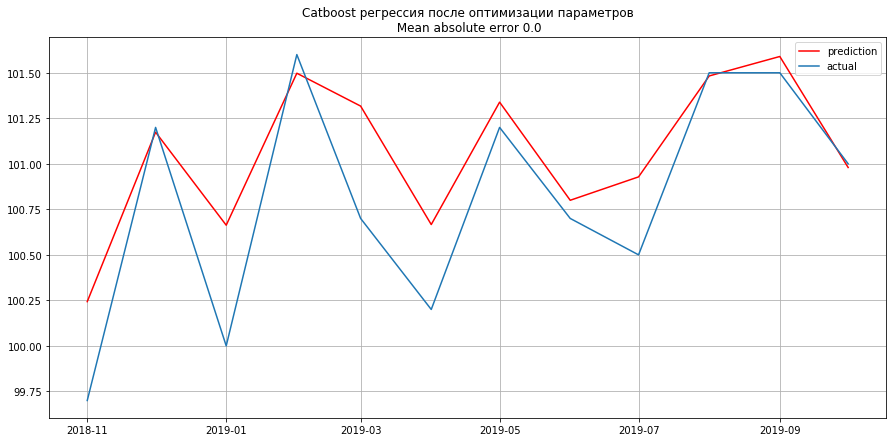

In [73]:
plt.figure(figsize=(15, 7))
plt.plot(df4.Date[len(df4)-12:],pred2, "r", label="prediction")
plt.plot(df4.Date[len(df4)-12:],y_true.values, label="actual")
plt.legend(loc="best")
plt.title("Catboost регрессия после оптимизации параметров\n Mean absolute error {}".format(round(mean_absolute_error(y_true,pred2))))
plt.grid(True);

In [66]:
mean_absolute_error(y_true,pred2)

0.14030630100169125